# Pengumpulan Data

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Twitter Auth Token

twitter_auth_token = 'ccb0a6dc47226f7ddc27a7a0975107094c8899e3'

In [ ]:
# Install Node.js
%sudo apt-get update
%sudo apt-get install -y ca-certificates curl gnupg
%sudo mkdir -p /etc/apt/keyrings
%curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

%NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

%sudo apt-get update
%sudo apt-get install nodejs -y

%node -v

In [ ]:
# Crawl Data
import os

# List keyword untuk digunakan
keywords = [
    'gaji gen z lang:id until:2024-12-31 since:2020-01-01',
    'kesehatan mental generasi z lang:id until:2024-12-31 since:2020-01-01'
    'finansial gen z lang:id until:2024-12-31 since:2020-01-01'
]

# Filename untuk setiap keyword
filenames = [
    'dataset-gaji-gen-z.csv',
    'dataset_kesehatan_mental_generasi_z.csv',
    'dataset_finansial_gen_z.csv'
]

# Limit data yang ingin dikumpulkan
limit = 50000

# Lakukan crawling untuk setiap keyword
for keyword, filename in zip(keywords, filenames):
    os.system(f'npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}')

# Pra-pemrosesan data

In [2]:
import pandas as pd

# Membaca dataset
df1 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/REAL-DATA/REAL-dataset_finansial_gen_z.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/REAL-DATA/REAL-dataset_gaji_gen_z.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/REAL-DATA/REAL-dataset_kesehatan_mental_generasi_z.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data matang/dataset_finansial_gen_z.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data matang/dataset_gaji_gen_z.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data matang/dataset_kesehatan_mental_generasi_z-TGL.csv')

# Menambahkan kolom keyword
df1['keyword'] = 'finansial gen z'
df2['keyword'] = 'gaji gen z'
df3['keyword'] = 'kesehatan mental generasi z'
df4['keyword'] = 'finansial gen z'
df5['keyword'] = 'gaji gen z'
df6['keyword'] = 'kesehatan mental generasi z'

# Menggabungkan data set berdasarkan keyword
df_finansial = pd.concat([df1, df4], ignore_index=True)
df_gaji = pd.concat([df2, df5], ignore_index=True)
df_kesehatan_mental = pd.concat([df3, df6], ignore_index=True)

# Menggabungkan semua dataframe menjadi satu
merge_df = pd.concat([df_finansial, df_gaji, df_kesehatan_mental], ignore_index=True)

# Menyimpan ke CSV
merge_df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-kotor.csv', index=False)

conversation_id_str                      created_at  favorite_count  \
0    1873627304632758640  Mon Dec 30 07:08:54 +0000 2024               0   
1    1873552074291765383  Mon Dec 30 02:09:58 +0000 2024               0   
2    1873198670558183506  Sun Dec 29 02:45:40 +0000 2024               0   
3    1872963394632101930  Sat Dec 28 11:10:45 +0000 2024             123   
4    1872907838714229142  Sat Dec 28 07:30:00 +0000 2024               0   
..                   ...                             ...             ...   
446  1287968595243405314  Tue Jul 28 04:30:17 +0000 2020               2   
447  1273488173532938240  Thu Jun 18 06:29:17 +0000 2020               0   
448  1235524166519885825  Thu Mar 05 11:14:50 +0000 2020               3   
449  1215396692926746625  Thu Jan 09 22:15:27 +0000 2020               0   
450  1215395587614359553  Thu Jan 09 22:11:03 +0000 2020               0   

                                             full_text               id_str  \
0    Kemudahan dalam berbelanja maupun mengakses pr...  1873627304632758640   
1    4 Langkah Sederhana Investasi untuk Gen Z Capa...  1873552074291765383   
2    4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  1873198670558183506   
3    Assalamu alaikum Sahabat Syariah! Tantangan so...  1872963394632101930   
4    Finansial yang sehat itu bukan cuma soal punya...  1872907838714229142   
..                                                 ...                  ...   
446  Acara yang berbasis online ini merupakan sebua...  1287968595243405314   
447  @detiksport Kalo masalahnya finansial bisa dim...  1273503030978068480   
448  Tahukah Smart People jika Generasi Z tercatat ...  1235524166519885825   
449  Yrl Mendekati usia 20 tahun gatau kenapa banya...  1215396692926746625   
450  Mendekati usia 20 tahun gatau kenapa banyak ba...  1215395587614359553   

                                           image_url in_reply_to_screen_name  \
0                                                NaN                     NaN   
1    https://pbs.twimg.com/media/GgAxaBXawAAaveA.jpg                     NaN   
2                                                NaN                     NaN   
3    https://pbs.twimg.com/media/Gf4aRbyawAgqR32.jpg                     NaN   
4    https://pbs.twimg.com/media/Gf22shuagAA-GV5.jpg                     NaN   
..                                               ...                     ...   
446                                              NaN                     NaN   
447                                              NaN              detiksport   
448  https://pbs.twimg.com/media/ESV2rbvUwAIiilw.jpg                     NaN   
449                                              NaN                     NaN   
450                                              NaN                     NaN   

    lang                  location  quote_count  reply_count  retweet_count  \
0     in                 Indonesia            0            0              0   
1     in                 Indonesia            0            0              0   
2     in                 Indonesia            0            0              0   
3     in        Jakarta, Indonesia            0            4             55   
4     in        Jakarta, Indonesia            0            1              1   
..   ...                       ...          ...          ...            ...   
446   in        www.marketeers.com            0            0              0   
447   in  Kota Bandung, Jawa Barat            0            0              0   
448   in               DKI Jakarta            0            1              0   
449   in         RULES TAP LINK ‼️            0            3              1   
450   in                       NaN            0            0              0   

                                             tweet_url          user_id_str  \
0    https://x.com/JavanicaPost/status/187362730463...  1846016698920685568   
1    https://x.com/digivestasi/status/1873552074291...  1450395130792329223

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-kotor.csv')
df.count()

conversation_id_str        8369
created_at                 8369
favorite_count             8369
full_text                  8369
id_str                     8369
image_url                   692
in_reply_to_screen_name    4689
lang                       8369
location                   4065
quote_count                8369
reply_count                8369
retweet_count              8369
tweet_url                  8369
user_id_str                8369
username                   8369
keyword                    8369
dtype: int64

In [9]:
#drop column is not needed
df.drop(df.columns[[0,2,4,5,6,7,8,9,10,11,12,11,13,14]], axis=1, inplace=True)
df.count()

created_at    8369
full_text     8369
keyword       8369
dtype: int64

In [10]:
# drop row have duplicate value
df.drop_duplicates(subset=['full_text'], inplace=True)

#drop row have missing value
df.dropna(subset=['full_text'], inplace=True)

df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets.csv', index=False)
df.count()

created_at    5387
full_text     5387
keyword       5387
dtype: int64

## cleansing data

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets.csv')
df.head()

created_at  \
0  Mon Dec 30 07:08:54 +0000 2024   
1  Mon Dec 30 02:09:58 +0000 2024   
2  Sun Dec 29 02:45:40 +0000 2024   
3  Sat Dec 28 11:10:45 +0000 2024   
4  Sat Dec 28 07:30:00 +0000 2024   

                                           full_text          keyword  
0  Kemudahan dalam berbelanja maupun mengakses pr...  finansial gen z  
1  4 Langkah Sederhana Investasi untuk Gen Z Capa...  finansial gen z  
2  4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  finansial gen z  
3  Assalamu alaikum Sahabat Syariah! Tantangan so...  finansial gen z  
4  Finansial yang sehat itu bukan cuma soal punya...  finansial gen z

In [4]:
# cleansing data
import re
import string

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # delete mention
    text = re.sub(r'#', '', text) # delete hastag
    text = re.sub(r'RT[\s]+', '', text) # delate RT
    text = re.sub(r'https?:\/\/\S+', '', text) # delete hyperlink
    text = re.sub(r'\n', '', text) # delete new line
    text = re.sub(r'\d+', '', text) # delete number
    text = re.sub(r'[^A-Za-z ]+', '', text) # delete non alphabet

    text = text.replace('…', '') # delete ellipsis
    text = text.translate(str.maketrans('', '', string.punctuation)) # delete punctuation
    text = text.strip() # delete space
    return text

df ['cleanning_text'] = df['full_text'].apply(clean_text)
df.head()

created_at  \
0  Mon Dec 30 07:08:54 +0000 2024   
1  Mon Dec 30 02:09:58 +0000 2024   
2  Sun Dec 29 02:45:40 +0000 2024   
3  Sat Dec 28 11:10:45 +0000 2024   
4  Sat Dec 28 07:30:00 +0000 2024   

                                           full_text          keyword  \
0  Kemudahan dalam berbelanja maupun mengakses pr...  finansial gen z   
1  4 Langkah Sederhana Investasi untuk Gen Z Capa...  finansial gen z   
2  4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  finansial gen z   
3  Assalamu alaikum Sahabat Syariah! Tantangan so...  finansial gen z   
4  Finansial yang sehat itu bukan cuma soal punya...  finansial gen z   

                                      cleanning_text  
0  Kemudahan dalam berbelanja maupun mengakses pr...  
1  Langkah Sederhana Investasi untuk Gen Z Capai ...  
2  Langkah Mudah Mulai Investasi Buat Gen Z Menuj...  
3  Assalamu alaikum Sahabat Syariah Tantangan sos...  
4  Finansial yang sehat itu bukan cuma soal punya...

## case folding

In [5]:
# case folding
def case_folding(text):
    text = text.lower() # change to lower case
    return text

df['case_folding'] = df['cleanning_text'].apply(case_folding)
df.head()

created_at  \
0  Mon Dec 30 07:08:54 +0000 2024   
1  Mon Dec 30 02:09:58 +0000 2024   
2  Sun Dec 29 02:45:40 +0000 2024   
3  Sat Dec 28 11:10:45 +0000 2024   
4  Sat Dec 28 07:30:00 +0000 2024   

                                           full_text          keyword  \
0  Kemudahan dalam berbelanja maupun mengakses pr...  finansial gen z   
1  4 Langkah Sederhana Investasi untuk Gen Z Capa...  finansial gen z   
2  4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  finansial gen z   
3  Assalamu alaikum Sahabat Syariah! Tantangan so...  finansial gen z   
4  Finansial yang sehat itu bukan cuma soal punya...  finansial gen z   

                                      cleanning_text  \
0  Kemudahan dalam berbelanja maupun mengakses pr...   
1  Langkah Sederhana Investasi untuk Gen Z Capai ...   
2  Langkah Mudah Mulai Investasi Buat Gen Z Menuj...   
3  Assalamu alaikum Sahabat Syariah Tantangan sos...   
4  Finansial yang sehat itu bukan cuma soal punya...   

                                        case_folding  
0  kemudahan dalam berbelanja maupun mengakses pr...  
1  langkah sederhana investasi untuk gen z capai ...  
2  langkah mudah mulai investasi buat gen z menuj...  
3  assalamu alaikum sahabat syariah tantangan sos...  
4  finansial yang sehat itu bukan cuma soal punya...

## convert slang word

In [6]:
# convert slang word
slang_words = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/refs/heads/master/colloquial-indonesian-lexicon.csv')
slang_words_dict = dict(zip(slang_words['slang'], slang_words['formal']))

# Fungsi untuk mengonversi slang word
def convert_slang_word(text):
    return ' '.join([slang_words_dict.get(word, word) for word in text.split()])

# Menerapkan fungsi ke kolom 'case_folding'
df['convert_slang_word'] = df['case_folding'].apply(convert_slang_word)
df.head()

created_at  \
0  Mon Dec 30 07:08:54 +0000 2024   
1  Mon Dec 30 02:09:58 +0000 2024   
2  Sun Dec 29 02:45:40 +0000 2024   
3  Sat Dec 28 11:10:45 +0000 2024   
4  Sat Dec 28 07:30:00 +0000 2024   

                                           full_text          keyword  \
0  Kemudahan dalam berbelanja maupun mengakses pr...  finansial gen z   
1  4 Langkah Sederhana Investasi untuk Gen Z Capa...  finansial gen z   
2  4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  finansial gen z   
3  Assalamu alaikum Sahabat Syariah! Tantangan so...  finansial gen z   
4  Finansial yang sehat itu bukan cuma soal punya...  finansial gen z   

                                      cleanning_text  \
0  Kemudahan dalam berbelanja maupun mengakses pr...   
1  Langkah Sederhana Investasi untuk Gen Z Capai ...   
2  Langkah Mudah Mulai Investasi Buat Gen Z Menuj...   
3  Assalamu alaikum Sahabat Syariah Tantangan sos...   
4  Finansial yang sehat itu bukan cuma soal punya...   

                                        case_folding  \
0  kemudahan dalam berbelanja maupun mengakses pr...   
1  langkah sederhana investasi untuk gen z capai ...   
2  langkah mudah mulai investasi buat gen z menuj...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial yang sehat itu bukan cuma soal punya...   

                                  convert_slang_word  
0  kemudahan dalam berbelanja maupun mengakses pr...  
1  langkah sederhana investasi untuk gen saja cap...  
2  langkah mudah mulai investasi buat gen saja me...  
3  assalamu alaikum sahabat syariah tantangan sos...  
4  finansial yang sehat itu bukan cuma soal punya...

## Stop word

In [7]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [8]:
# Stop word
# from nltk.corpus import stopwords

# def filtering(text):
#     stop_words = set(stopwords.words('indonesian'))
#     word_tokens = text.split()
#     text = [word for word in word_tokens if word not in stop_words]
#     text = ' '.join(text)
#     return text

# df['filtering'] = df['convert_slang_word'].apply(filtering)
# df

# Stop word

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def filtering(text):
    factory = StopWordRemoverFactory()
    stop_words = set(factory.get_stop_words())
    word_tokens = text.split()
    text = [word for word in word_tokens if word not in stop_words]
    text = ' '.join(text)
    return text

df['filtering'] = df['convert_slang_word'].apply(filtering)
df.head()

created_at  \
0  Mon Dec 30 07:08:54 +0000 2024   
1  Mon Dec 30 02:09:58 +0000 2024   
2  Sun Dec 29 02:45:40 +0000 2024   
3  Sat Dec 28 11:10:45 +0000 2024   
4  Sat Dec 28 07:30:00 +0000 2024   

                                           full_text          keyword  \
0  Kemudahan dalam berbelanja maupun mengakses pr...  finansial gen z   
1  4 Langkah Sederhana Investasi untuk Gen Z Capa...  finansial gen z   
2  4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  finansial gen z   
3  Assalamu alaikum Sahabat Syariah! Tantangan so...  finansial gen z   
4  Finansial yang sehat itu bukan cuma soal punya...  finansial gen z   

                                      cleanning_text  \
0  Kemudahan dalam berbelanja maupun mengakses pr...   
1  Langkah Sederhana Investasi untuk Gen Z Capai ...   
2  Langkah Mudah Mulai Investasi Buat Gen Z Menuj...   
3  Assalamu alaikum Sahabat Syariah Tantangan sos...   
4  Finansial yang sehat itu bukan cuma soal punya...   

                                        case_folding  \
0  kemudahan dalam berbelanja maupun mengakses pr...   
1  langkah sederhana investasi untuk gen z capai ...   
2  langkah mudah mulai investasi buat gen z menuj...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial yang sehat itu bukan cuma soal punya...   

                                  convert_slang_word  \
0  kemudahan dalam berbelanja maupun mengakses pr...   
1  langkah sederhana investasi untuk gen saja cap...   
2  langkah mudah mulai investasi buat gen saja me...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial yang sehat itu bukan cuma soal punya...   

                                           filtering  
0  kemudahan berbelanja maupun mengakses produk p...  
1  langkah sederhana investasi gen capai stabilit...  
2  langkah mudah mulai investasi buat gen menuju ...  
3  assalamu alaikum sahabat syariah tantangan sos...  
4  finansial sehat bukan cuma soal punya banyak u...

## tokenizing

In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
# tokenizing
from nltk.tokenize import word_tokenize

def tokenizing(text):
    text = word_tokenize(text)
    return text

df['tokenizing'] = df['filtering'].apply(tokenizing)
df.head()

created_at  \
0  Mon Dec 30 07:08:54 +0000 2024   
1  Mon Dec 30 02:09:58 +0000 2024   
2  Sun Dec 29 02:45:40 +0000 2024   
3  Sat Dec 28 11:10:45 +0000 2024   
4  Sat Dec 28 07:30:00 +0000 2024   

                                           full_text          keyword  \
0  Kemudahan dalam berbelanja maupun mengakses pr...  finansial gen z   
1  4 Langkah Sederhana Investasi untuk Gen Z Capa...  finansial gen z   
2  4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  finansial gen z   
3  Assalamu alaikum Sahabat Syariah! Tantangan so...  finansial gen z   
4  Finansial yang sehat itu bukan cuma soal punya...  finansial gen z   

                                      cleanning_text  \
0  Kemudahan dalam berbelanja maupun mengakses pr...   
1  Langkah Sederhana Investasi untuk Gen Z Capai ...   
2  Langkah Mudah Mulai Investasi Buat Gen Z Menuj...   
3  Assalamu alaikum Sahabat Syariah Tantangan sos...   
4  Finansial yang sehat itu bukan cuma soal punya...   

                                        case_folding  \
0  kemudahan dalam berbelanja maupun mengakses pr...   
1  langkah sederhana investasi untuk gen z capai ...   
2  langkah mudah mulai investasi buat gen z menuj...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial yang sehat itu bukan cuma soal punya...   

                                  convert_slang_word  \
0  kemudahan dalam berbelanja maupun mengakses pr...   
1  langkah sederhana investasi untuk gen saja cap...   
2  langkah mudah mulai investasi buat gen saja me...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial yang sehat itu bukan cuma soal punya...   

                                           filtering  \
0  kemudahan berbelanja maupun mengakses produk p...   
1  langkah sederhana investasi gen capai stabilit...   
2  langkah mudah mulai investasi buat gen menuju ...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial sehat bukan cuma soal punya banyak u...   

                                          tokenizing  
0  [kemudahan, berbelanja, maupun, mengakses, pro...  
1  [langkah, sederhana, investasi, gen, capai, st...  
2  [langkah, mudah, mulai, investasi, buat, gen, ...  
3  [assalamu, alaikum, sahabat, syariah, tantanga...  
4  [finansial, sehat, bukan, cuma, soal, punya, b...

## stemming

In [11]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(tokens):
    text = ' '.join(tokens)  # Join the tokens back into a single string
    return stemmer.stem(text)

df['stemming'] = df['tokenizing'].apply(stem_text)
df.head()

created_at  \
0  Mon Dec 30 07:08:54 +0000 2024   
1  Mon Dec 30 02:09:58 +0000 2024   
2  Sun Dec 29 02:45:40 +0000 2024   
3  Sat Dec 28 11:10:45 +0000 2024   
4  Sat Dec 28 07:30:00 +0000 2024   

                                           full_text          keyword  \
0  Kemudahan dalam berbelanja maupun mengakses pr...  finansial gen z   
1  4 Langkah Sederhana Investasi untuk Gen Z Capa...  finansial gen z   
2  4 Langkah Mudah Mulai Investasi Buat Gen Z Men...  finansial gen z   
3  Assalamu alaikum Sahabat Syariah! Tantangan so...  finansial gen z   
4  Finansial yang sehat itu bukan cuma soal punya...  finansial gen z   

                                      cleanning_text  \
0  Kemudahan dalam berbelanja maupun mengakses pr...   
1  Langkah Sederhana Investasi untuk Gen Z Capai ...   
2  Langkah Mudah Mulai Investasi Buat Gen Z Menuj...   
3  Assalamu alaikum Sahabat Syariah Tantangan sos...   
4  Finansial yang sehat itu bukan cuma soal punya...   

                                        case_folding  \
0  kemudahan dalam berbelanja maupun mengakses pr...   
1  langkah sederhana investasi untuk gen z capai ...   
2  langkah mudah mulai investasi buat gen z menuj...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial yang sehat itu bukan cuma soal punya...   

                                  convert_slang_word  \
0  kemudahan dalam berbelanja maupun mengakses pr...   
1  langkah sederhana investasi untuk gen saja cap...   
2  langkah mudah mulai investasi buat gen saja me...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial yang sehat itu bukan cuma soal punya...   

                                           filtering  \
0  kemudahan berbelanja maupun mengakses produk p...   
1  langkah sederhana investasi gen capai stabilit...   
2  langkah mudah mulai investasi buat gen menuju ...   
3  assalamu alaikum sahabat syariah tantangan sos...   
4  finansial sehat bukan cuma soal punya banyak u...   

                                          tokenizing  \
0  [kemudahan, berbelanja, maupun, mengakses, pro...   
1  [langkah, sederhana, investasi, gen, capai, st...   
2  [langkah, mudah, mulai, investasi, buat, gen, ...   
3  [assalamu, alaikum, sahabat, syariah, tantanga...   
4  [finansial, sehat, bukan, cuma, soal, punya, b...   

                                            stemming  
0  mudah belanja maupun akses produk pinjam kini ...  
1  langkah sederhana investasi gen capai stabilit...  
2  langkah mudah mulai investasi buat gen tuju fi...  
3  assalamu alaikum sahabat syariah tantang sosia...  
4  finansial sehat bukan cuma soal punya banyak u...

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          5387 non-null   object
 1   full_text           5387 non-null   object
 2   keyword             5387 non-null   object
 3   cleanning_text      5387 non-null   object
 4   case_folding        5387 non-null   object
 5   convert_slang_word  5387 non-null   object
 6   filtering           5387 non-null   object
 7   tokenizing          5387 non-null   object
 8   stemming            5387 non-null   object
dtypes: object(9)
memory usage: 378.9+ KB


In [13]:
df.drop(df.columns[[1, 3, 4, 5, 6, 7]], axis=1, inplace=True)

# Rename column 'stemming' to 'full_text'
df.rename(columns={'stemming': 'full_text'}, inplace=True)

df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-clean.csv', index=False)

# Pelabelan Data

In [18]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-clean.csv')
df.head()

created_at          keyword  \
0  Mon Dec 30 07:08:54 +0000 2024  finansial gen z   
1  Mon Dec 30 02:09:58 +0000 2024  finansial gen z   
2  Sun Dec 29 02:45:40 +0000 2024  finansial gen z   
3  Sat Dec 28 11:10:45 +0000 2024  finansial gen z   
4  Sat Dec 28 07:30:00 +0000 2024  finansial gen z   

                                           full_text  
0  mudah belanja maupun akses produk pinjam kini ...  
1  langkah sederhana investasi gen capai stabilit...  
2  langkah mudah mulai investasi buat gen tuju fi...  
3  assalamu alaikum sahabat syariah tantang sosia...  
4  finansial sehat bukan cuma soal punya banyak u...

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  5387 non-null   object
 1   keyword     5387 non-null   object
 2   full_text   5387 non-null   object
dtypes: object(3)
memory usage: 126.4+ KB


In [20]:
import pandas as pd

#unduh kamus inset lexicon positif dan negatif
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep='\t', header=None)[0])

#fungsi menghitung skor sentimen
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = 'Positif'
        elif sentiment_score < 0:
            sentiment = 'Negatif'
        else:
            sentiment = 'Netral'
        return sentiment_score, sentiment
    return 0, "netral"

#menerapkan perhitungan ke datasets
df[['score', 'label']] = df['full_text'].apply(lambda x: pd.Series(determine_sentiment(x)))

df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-label.csv', index=False)


In [21]:
# Menghitung jumlah label
df['label'].value_counts()

label
Negatif    2955
Positif    1662
Netral      770
Name: count, dtype: int64

# Ekstraksi Fitur

In [22]:
import pandas as pd
#Membaca dataset yang sudah diberi label
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-label.csv')
df['label'].value_counts()

label
Negatif    2955
Positif    1662
Netral      770
Name: count, dtype: int64

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-label.csv')
# Convert text to vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(df['full_text'])

tfidf = x.toarray()
print(tfidf[:1])

# Convert the array to a DataFrame
tfidf_df = pd.DataFrame(tfidf)

# Save the DataFrame to a CSV file
tfidf_df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-tfidf.csv', index=False)

[[0. 0. 0. ... 0. 0. 0.]]


# Data Balancing

In [25]:
import pandas as pd

tfidf_data = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-tfidf.csv")
labels_data = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-label.csv")

# Drop rows with null values in labels_data
labels_data = labels_data.dropna(subset=['label'])

# Merge the TF-IDF features with the labels
data = pd.concat([tfidf_data, labels_data['label']], axis=1)
data.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-balance.csv', index=False)
print(data.head())

     0    1    2    3    4    5    6    7    8    9  ...  11394  11395  11396  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   11397  11398  11399  11400  11401  11402    label  
0    0.0    0.0    0.0    0.0    0.0    0.0  Positif  
1    0.0    0.0    0.0    0.0    0.0    0.0  Positif  
2    0.0    0.0    0.0    0.0    0.0    0.0  Positif  
3    0.0    0.0    0.0    0.0    0.0    0.0  Positif  
4    0.0    0.0    0.0    0.0    0.0    0.0  Positif  

[5 rows x 11404 columns]


In [26]:
df_combined = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-balance.csv')
df['label'].value_counts()

label
Negatif    2955
Positif    1662
Netral      770
Name: count, dtype: int64

In [27]:
# Import library yang diperlukan
import pandas as pd
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan label
X = df_combined.drop(columns=['label'])  # Menghapus kolom label
y = df_combined['label']  # Mengambil kolom label

# Menggunakan SMOTE untuk melakukan data balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan jumlah kelas setelah balancing
print("Jumlah kelas sebelum SMOTE:")
print(y.value_counts())
print("\nJumlah kelas setelah SMOTE:")
print(y_resampled.value_counts())

# Menyimpan dataset yang sudah di-balance ke file CSV
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['label'])], axis=1)
balanced_df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-balanced.csv', index=False)

Jumlah kelas sebelum SMOTE:
label
Negatif    2955
Positif    1662
Netral      770
Name: count, dtype: int64

Jumlah kelas setelah SMOTE:
label
Positif    2955
Negatif    2955
Netral     2955
Name: count, dtype: int64


# Modeling

## Support Vector Machine

In [28]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Membaca dataset yang sudah di-balance
df_balanced = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-balanced.csv')

# Memisahkan fitur dan label
X = df_balanced.drop(columns=['label'])  # Menghapus kolom label
y = df_balanced['label']  # Mengambil kolom label

# Membagi dataset menjadi data latih (80%) dan data uji 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membuat model SVM
svm_model = SVC(kernel='linear', random_state=42)  # Anda bisa mengganti kernel sesuai kebutuhan
svm_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi model menggunakan cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)  # Menggunakan 5-fold cross-validation

# Menampilkan hasil cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")


Confusion Matrix:
[[487  85  19]
 [ 16 561  14]
 [ 15  35 541]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.94      0.82      0.88       591
      Netral       0.82      0.95      0.88       591
     Positif       0.94      0.92      0.93       591

    accuracy                           0.90      1773
   macro avg       0.90      0.90      0.90      1773
weighted avg       0.90      0.90      0.90      1773


Cross-Validation Scores:
[0.79526227 0.83981951 0.83417936 0.93175409 0.94585448]
Mean Cross-Validation Score: 0.8694
Standard Deviation of Cross-Validation Scores: 0.0589


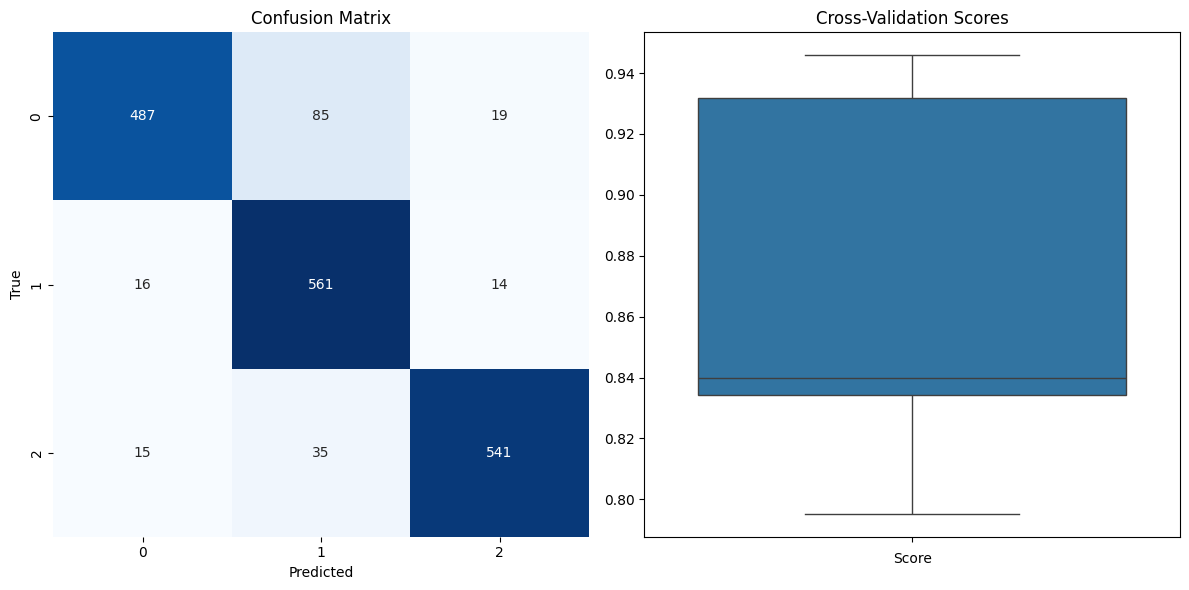

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 6))

# Subplot for Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subplot for Cross-Validation Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_scores, orient='w')
plt.title('Cross-Validation Scores')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

In [30]:
import joblib
from sklearn.metrics import classification_report

# Menampilkan hasil evaluasi
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get report as dict

# Save the model
with open('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/HASIL-RISET/model-svm.pkl', 'wb') as file:
    joblib.dump(svm_model, file)

# Save evaluation results
results = {
    'Confusion Matrix': [conf_matrix.flatten()],  # Flatten for easier saving
    'Classification Report': [class_report],
    'Cross-Validation Scores': [cv_scores.tolist()],
    'Mean CV Score': [cv_scores.mean()],
    'Std Dev CV Score': [cv_scores.std()]
}

results_df = pd.DataFrame(results)
results_df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/HASIL-RISET/evaluation_results_SVM.csv', index=False)  # Save results to CSV

## Naive Bayes

In [31]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Membaca dataset yang sudah di-balance
df_balanced = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-balanced.csv')

# Memisahkan fitur dan label
X = df_balanced.drop(columns=['label'])  # Menghapus kolom label
y = df_balanced['label']  # Mengambil kolom label

# Membagi dataset menjadi data latih (80%) dan data uji 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membuat model Naive Bayes
nb_model = GaussianNB()  # Model Naive Bayes
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = nb_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi model menggunakan cross-validation
cv_scores = cross_val_score(nb_model, X, y, cv=5)  # Menggunakan 5-fold cross-validation

# Menampilkan hasil cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")

Confusion Matrix:
[[226 181 184]
 [  3 588   0]
 [ 52  84 455]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.80      0.38      0.52       591
      Netral       0.69      0.99      0.81       591
     Positif       0.71      0.77      0.74       591

    accuracy                           0.72      1773
   macro avg       0.74      0.72      0.69      1773
weighted avg       0.74      0.72      0.69      1773


Cross-Validation Scores:
[0.68640722 0.69204738 0.69543147 0.74619289 0.75521715]
Mean Cross-Validation Score: 0.7151
Standard Deviation of Cross-Validation Scores: 0.0294


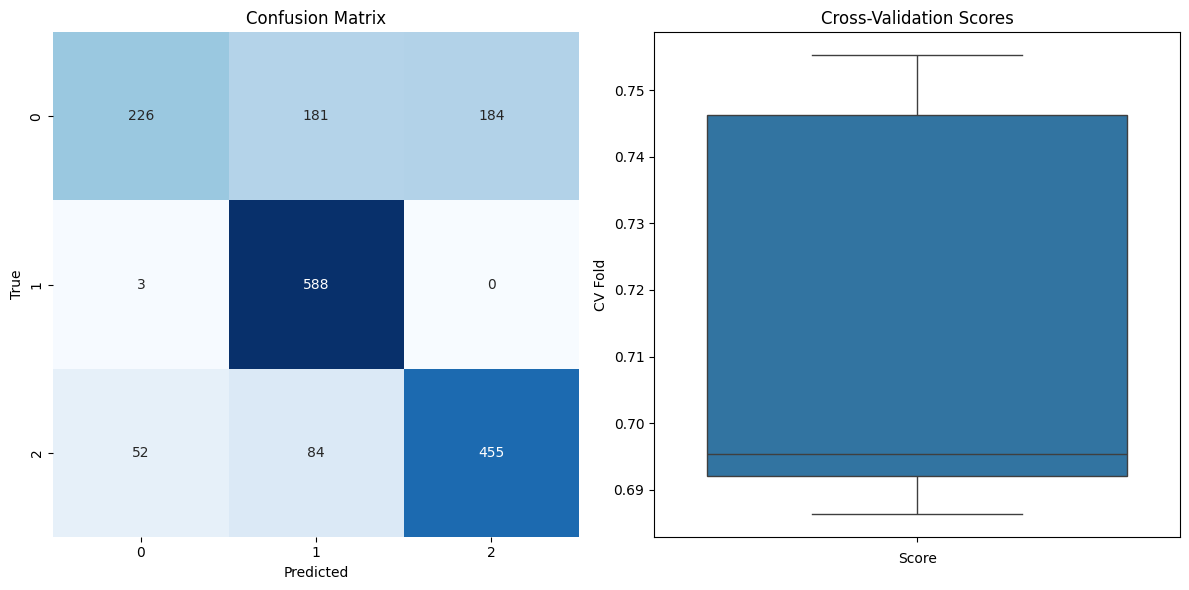

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 6))

# Subplot for Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subplot for Cross-Validation Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_scores, orient='w')
plt.title('Cross-Validation Scores')
plt.xlabel('Score')
plt.ylabel('CV Fold')

plt.tight_layout()
plt.show()

In [33]:
import joblib

# Menampilkan hasil evaluasi
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get report as dict

# Save the model
with open('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/HASIL-RISET/model-nb.pkl', 'wb') as file:
    joblib.dump(nb_model, file)

# Save evaluation results
results = {
    'Confusion Matrix': [conf_matrix.flatten()],  # Flatten for easier saving
    'Classification Report': [class_report],
    'Cross-Validation Scores': [cv_scores.tolist()],
    'Mean CV Score': [cv_scores.mean()],
    'Std Dev CV Score': [cv_scores.std()]
}

results_df = pd.DataFrame(results)
results_df.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/HASIL-RISET/evaluation_results_nb.csv', index=False)  # Save results to CSV

## K-Nearest Neighbor

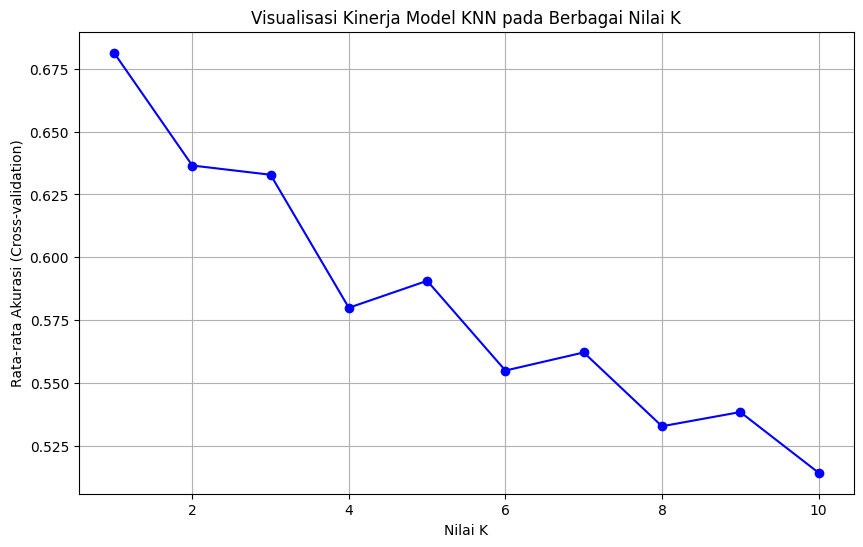

Optimal K = 3
Confusion Matrix:
[[ 96 370 125]
 [  0 582   9]
 [  8 119 464]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.92      0.16      0.28       591
      Netral       0.54      0.98      0.70       591
     Positif       0.78      0.79      0.78       591

    accuracy                           0.64      1773
   macro avg       0.75      0.64      0.59      1773
weighted avg       0.75      0.64      0.59      1773


Cross-Validation Scores:
[0.56739989 0.58657642 0.58319233 0.72758037 0.76875353]
Mean Cross-Validation Score: 0.6467
Standard Deviation of Cross-Validation Scores: 0.0841


In [34]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Membaca dataset yang sudah di-balance
df_balanced = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/data-analisis/datasets-balanced.csv')

# Memisahkan fitur dan label
X = df_balanced.drop(columns=['label'])  # Menghapus kolom label
y = df_balanced['label']  # Mengambil kolom label

# Membagi dataset menjadi data latih (80%) dan data uji 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mencari nilai K optimal menggunakan GridSearchCV
param_grid = {'n_neighbors': range(1, 11)}  # Mencoba nilai K dari 1 hingga 10
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)  # Menggunakan 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Mengambil hasil dari GridSearchCV untuk visualisasi
results = grid_search.cv_results_

# Menyusun nilai K dan rata-rata akurasi untuk setiap nilai K
k_values = results['param_n_neighbors'].data  # Nilai K yang dicoba
mean_test_scores = results['mean_test_score']  # Rata-rata akurasi untuk setiap K

# Visualisasi hasil dengan line chart
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-', color='b', label='Mean Test Score')
plt.title('Visualisasi Kinerja Model KNN pada Berbagai Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-rata Akurasi (Cross-validation)')
plt.grid(True)
plt.show()

# Menentukan nilai K optimal
optimal_k = grid_search.best_params_['n_neighbors']

# Memastikan nilai K memenuhi kriteria
if optimal_k == 1:
    # Jika K = 1, mencari nilai K terbaik berikutnya yang lebih besar dari 1 dan ganjil
    valid_k_values = [k for k in range(3, 11, 2)]  # K = 3, 5, 7, 9
    param_grid = {'n_neighbors': valid_k_values}
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    optimal_k = grid_search.best_params_['n_neighbors']
    print(f"Optimal K = {optimal_k}")

elif optimal_k == 2:
    # Jika K = 2, mencari nilai K terbaik berikutnya yang lebih besar dari 2 dan ganjil
    valid_k_values = [k for k in range(3, 11, 2)]  # K = 3, 5, 7, 9
    param_grid = {'n_neighbors': valid_k_values}
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    optimal_k = grid_search.best_params_['n_neighbors']
    print(f"Optimal K = {optimal_k}")

else:
    # Jika K tidak sama dengan 1 atau 2, maka K sudah valid
    print(f"Optimal K = {optimal_k}")

# Membuat model KNN dengan K optimal
knn_model = KNeighborsClassifier(n_neighbors = optimal_k)
knn_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi model menggunakan cross-validation
cv_scores = cross_val_score(knn_model, X, y, cv=5)  # Menggunakan 5-fold cross-validation

# Menampilkan hasil cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")

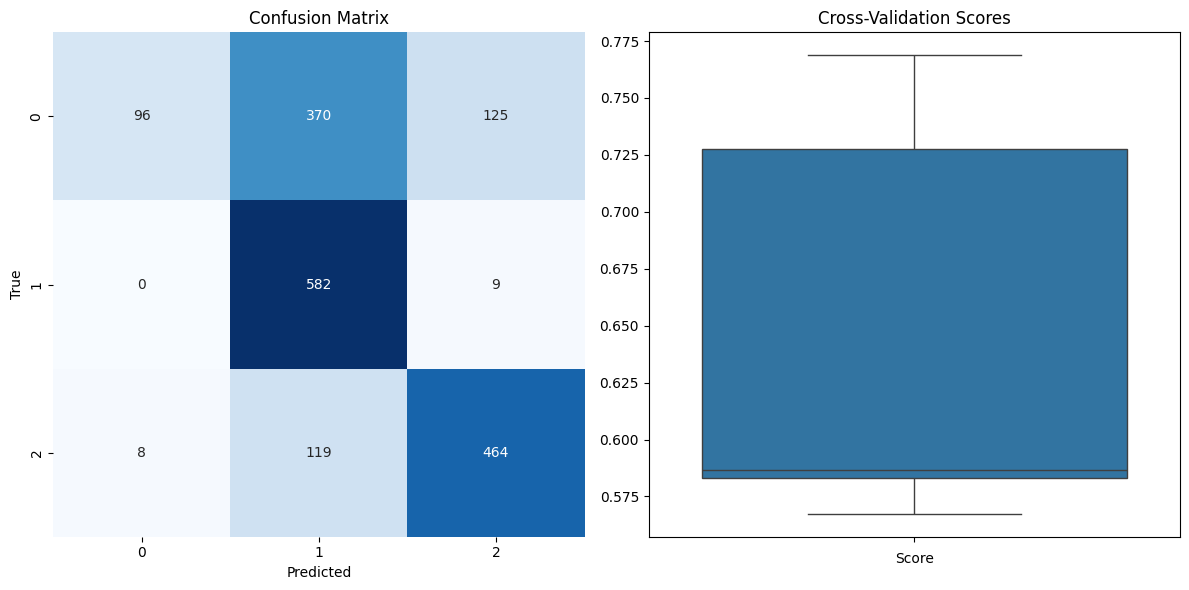

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 6))

# Subplot for Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subplot for Cross-Validation Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_scores, orient='w')
plt.title('Cross-Validation Scores')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

In [36]:
import joblib

# Menampilkan hasil evaluasi
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get report as dict

# # Save the model
# joblib.dump(knn_model, 'HASIL-RISET/knn_model.pkl')  # Save the model to a file
with open('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/HASIL-RISET/model-knn.pkl', 'wb') as file:
    joblib.dump(knn_model, file)

# Save evaluation results
results_knn = {
    'Confusion Matrix': [conf_matrix.flatten()], # Flatten for easier saving
    'Classification Report': [class_report],
    'Cross-Validation Scores': [cv_scores.tolist()],
    'Mean CV Score': [cv_scores.mean()],
    'Std Dev CV Score': [cv_scores.std()]
}

results_df_knn = pd.DataFrame(results_knn)
results_df_knn.to_csv('/content/drive/MyDrive/Tugas Akhir/datasets penelitian/HASIL-RISET/evaluation_results_knn-new.csv', index=False)  # Save results to CSV

# eksport Data Untuk Dashboard

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter

df=pd.read_csv('REAL-DATA/datasets-clean.csv')

def create_word_count_table(df, text_column):
    # Tokenizing the text data
    df['tokens'] = df[text_column].apply(word_tokenize)

    # Flatten the list of tokens and count the occurrences of each word
    all_tokens = [token for sublist in df['tokens'] for token in sublist]
    word_counts = Counter(all_tokens)

    # Convert the word counts to a DataFrame
    word_count_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

    return word_count_df

word_tokenize_df = create_word_count_table(df, 'full_text')
word_tokenize_df.to_csv('word_count_result.csv', index=False)

In [ ]:
df = pd.read_csv('word_count_result.csv')

df.isnull().sum()

# Mencari baris yang memiliki nilai NaN atau kosong
df[df.isnull().any(axis=1)]

# Menampilkan baris yang memiliki nilai NaN atau kosong
# print(rows_with_nan)

df.dropna(inplace=True)

In [ ]:
df = pd.read_csv('word_count_result.csv')

positive_lexicon = pd.read_csv('InSet/positive.tsv', sep='\t', header=None)
negative_lexicon = pd.read_csv('InSet/negative.tsv', sep='\t', header=None)

# Gabungkan lexicon positif dan negatif
positive_lexicon.columns = ['kata', 'polaritas']
negative_lexicon.columns = ['kata', 'polaritas']

# Pastikan kolom polaritas bertipe numerik
positive_lexicon['polaritas'] = pd.to_numeric(positive_lexicon['polaritas'], errors='coerce')
negative_lexicon['polaritas'] = pd.to_numeric(negative_lexicon['polaritas'], errors='coerce')

lexicon = pd.concat([positive_lexicon, negative_lexicon])

# Konversi lexicon ke dictionary untuk lookup cepat
lexicon_dict = dict(zip(lexicon['kata'], lexicon['polaritas']))

# Fungsi untuk memberikan skor pada teks berdasarkan kamus lexicon
def label(tweet, lexicon_dict):
    words = tweet.split()  # Pisahkan tweet menjadi kata-kata
    sentiment_score = 0  # Inisialisasi skor sentimen

    # Hitung skor sentimen berdasarkan kata-kata dalam lexicon
    for word in words:
        sentiment = lexicon_dict.get(word, 0)  # Ambil polaritas dari dictionary, default 0 jika tidak ditemukan
        sentiment_score += sentiment

    # Berikan label berdasarkan skor polaritas total
    if sentiment_score > 0:
        return 'positif', sentiment_score
    elif sentiment_score < 0:
        return 'negatif', sentiment_score
    else:
        return 'netral', sentiment_score

# Handle NaN values in the 'word' column
df['word'].fillna('', inplace=True)

df['label', 'score'] = df['word'].apply(lambda x: pd.Series(label(x, lexicon_dict)))
df.to_csv('word_count_labeled.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('word_count_labeled.csv')

df['label'].value_counts()

df.groupby('label').apply(lambda x: x.loc[x['count'].idxmax()])

In [ ]:
# import pandas as pd
# from wordcloud import WordCloud, get_single_color_func
# import matplotlib.pyplot as plt

# df = pd.read_csv('word_count_labeled.csv')

# # Menampilkan jumlah label
# # print(df['label'].value_counts())

# # Fungsi untuk membuat dan menampilkan Word Cloud dengan warna berdasarkan label
# def plot_word_cloud(label, color):
#     words = df[df['label'] == label].set_index('word')['count'].to_dict()
#     wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=get_single_color_func(color)).generate_from_frequencies(words)

#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f'Word Cloud for {label} words')
#     plt.axis('off')
#     plt.show()

# # Menampilkan Word Cloud untuk setiap label dengan warna yang sesuai
# label_colors = {
#     'positif': 'green',
#     'negatif': 'red',
#     'netral': 'gray'
# }

# for label in df['label'].unique():
#     plot_word_cloud(label, label_colors[label])

In [ ]:
import pandas as pd

eval_svm = pd.read_csv('HASIL-RISET/evaluation_results_SVM-new.csv')
eval_nb = pd.read_csv('HASIL-RISET/evaluation_results_nb-new.csv')
eval_knn = pd.read_csv('HASIL-RISET/evaluation_results_knn-new.csv')

# penggabungan data evaluation
# Menambahkan kolom 'model' ke setiap DataFrame
eval_svm['model'] = 'svm'
eval_nb['model'] = 'nb'
eval_knn['model'] = 'knn'

# Mengatur ulang kolom agar 'model' menjadi kolom pertama
svm = eval_svm[['model'] + [col for col in eval_svm.columns if col != 'model']]
nb = eval_nb[['model'] + [col for col in eval_nb.columns if col != 'model']]
knn = eval_knn[['model'] + [col for col in eval_knn.columns if col != 'model']]

# Menggabungkan semua DataFrame
combined_df = pd.concat([svm, nb, knn], axis=0, ignore_index=True)

# Menampilkan hasil
print(combined_df.head())

combined_df.to_csv('HASIL-RISET/evaluation_results_combine.csv', index=False)